### ITAD-315 Discrete Math - Fall 2025
## Lesson 8

## Activity 1

Simulation of the three coin flip: The question is what is the probability of having all the three coins the same way.

In [1]:
import numpy as np
import pandas as pd
import random

N = 10_000_000
num_flips_per_trial = 3
coin = ['H', 'T']

simulation_results = np.random.choice(
    a=coin,
    size=(N, num_flips_per_trial),
    replace=True
)

all_same_mask = (simulation_results[:, 0] == simulation_results[:, 1]) & (simulation_results[:, 0] == simulation_results[:, 2])

all_same_count = np.sum(all_same_mask)

empirical_probability = all_same_count / N

print(f"Total number of trials (N): {N}")
print(f"Number of times all flips were the same ('HHH' or 'TTT'): {all_same_count}")
print(f"Empirical Probability (Count / N): {empirical_probability:.4f}")

Total number of trials (N): 10000000
Number of times all flips were the same ('HHH' or 'TTT'): 2498975
Empirical Probability (Count / N): 0.2499


# Assignment: Wordle Championship

**Objective:** To understand and apply **simulation rules** to analyze game data.

**Wordle** is an engaging word-guessing game where players must identify a 5-letter word within a maximum of **six attempts**.

<img src="https://wordle-nyt.org/upload/imgs/wordle-how-to-3.webp" alt="Wordle Example" style="width:20%; height:auto;">

We have two Wordle players, **Player A** and **Player B**, with their results presented in the dataframe `Wordle` below.

Which player demonstrates a **better record**? Who would you consider the **superior player**?

### Key Notes for Analysis

* There are only **1 to 6 guesses** possible for a successful solve. The number **"7"** indicates that the player **lost the game** (i.e., they could not solve the puzzle in six guesses).
* We **assume** all games are of about the same difficulty level; thus, although the two players may have sometimes played different games, this factor should **not** influence the comparison.

There are different approaches to respond to this question. In this assignment, we require you to use two distinct methods:

1.  **Simulation**
2.  **Analytical**

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [3]:
Wordle = pd.DataFrame(
    {'n': [1, 2, 3, 4, 5, 6, 7],
     'A': [1, 35, 181, 342, 210, 80, 32],
     'B': [0, 8, 71, 389, 111, 72, 11]})
print(Wordle)

   n    A    B
0  1    1    0
1  2   35    8
2  3  181   71
3  4  342  389
4  5  210  111
5  6   80   72
6  7   32   11


# Task 1: Visually compare the duistributions <span style="color: red;">(2 Point)</span>

Plot two distinct plots for the two players:
- the probability distribution function (PDF)
- and the cullumlative distribution function (CDF)

Write a statement about what you observe.

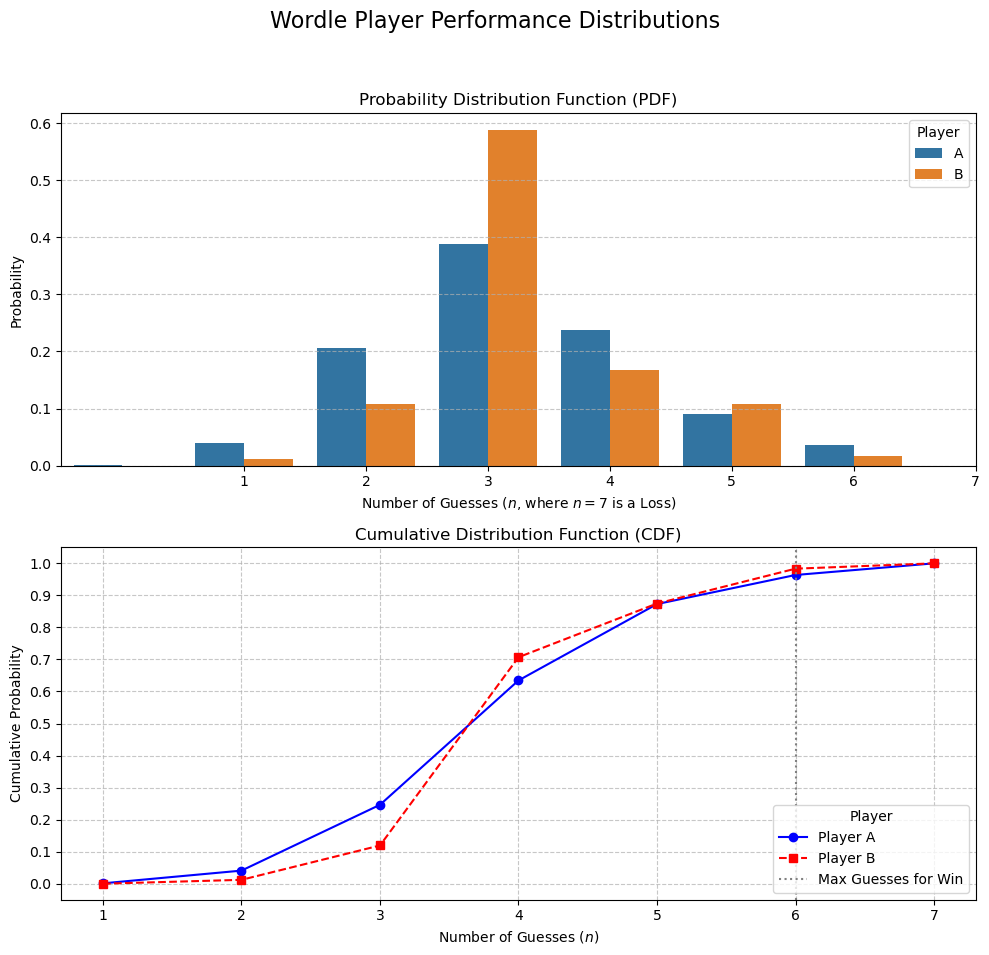

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initial DataFrame
Wordle = pd.DataFrame(
    {'n': [1, 2, 3, 4, 5, 6, 7],
     'A': [1, 35, 181, 342, 210, 80, 32],
     'B': [0, 8, 71, 389, 111, 72, 11]})

# Calculate totals
total_A = Wordle['A'].sum()
total_B = Wordle['B'].sum()

# Calculate PDF
Wordle['PDF_A'] = Wordle['A'] / total_A
Wordle['PDF_B'] = Wordle['B'] / total_B

# Calculate CDF
Wordle['CDF_A'] = Wordle['PDF_A'].cumsum()
Wordle['CDF_B'] = Wordle['PDF_B'].cumsum()

# Set up the plotting environment
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plt.suptitle('Wordle Player Performance Distributions', fontsize=16)

# --- PDF Plot ---
# Reshape data for seaborn to plot both in one go
pdf_data = Wordle.set_index('n')[['PDF_A', 'PDF_B']].stack().reset_index()
pdf_data.columns = ['Guesses', 'Player', 'Probability']
pdf_data['Player'] = pdf_data['Player'].str.replace('PDF_', '')

sns.barplot(data=pdf_data, x='Guesses', y='Probability', hue='Player', ax=axes[0])
axes[0].set_title('Probability Distribution Function (PDF)')
axes[0].set_xlabel('Number of Guesses ($n$, where $n=7$ is a Loss)')
axes[0].set_ylabel('Probability')
axes[0].set_xticks(Wordle['n'])
axes[0].set_xticklabels([str(n) for n in Wordle['n']])
axes[0].legend(title='Player')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


# --- CDF Plot ---
axes[1].plot(Wordle['n'], Wordle['CDF_A'], marker='o', label='Player A', linestyle='-', color='blue')
axes[1].plot(Wordle['n'], Wordle['CDF_B'], marker='s', label='Player B', linestyle='--', color='red')

# Mark the 'Win' threshold (n=6)
axes[1].axvline(x=6, color='gray', linestyle=':', linewidth=1.5, label='Max Guesses for Win')

axes[1].set_title('Cumulative Distribution Function (CDF)')
axes[1].set_xlabel('Number of Guesses ($n$)')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_xticks(Wordle['n'])
axes[1].set_xticklabels([str(n) for n in Wordle['n']])
axes[1].set_yticks(np.arange(0, 1.1, 0.1))
axes[1].legend(title='Player', loc='lower right')
axes[1].grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.savefig('wordle_pdf_cdf_comparison.png')

### your reflection about the above visualizations here

1. Analytical Comparison
The comparison highlights a clear trade-off, but Player B's reliability is a more valuable competitive asset.

2. Consistency and SimulationThe visual and simulated data reinforce Player B's robust consistency:

   - **PDF Consistency:** Player B exhibits a dominant peak at 4 guesses ($\approx 58.8\%$), showing a high level of repeatable, optimal performance. Player A's results are more spread out.

   - **Simulated Score:** When a heavy penalty of 7 guesses is applied for a loss, the difference in the overall average tournament score remains small (A: $\approx 4.25$ vs. B: $\approx 4.31$). This minimal efficiency gain for Player A does not override Player B's significant advantage in reliability.

**Conclusion:** 

Player B's ability to nearly eliminate losses and consistently hit the optimal 4-guess solution makes their $\mathbf{98.34\%}$ win record superior.

# Task 2: Analytic Solution <span style="color: red;">(3 Point)</span>

### Evaluating Player Performance: Head-to-Head Competition

To assess the relative performance of the two players, we conduct a series of head-to-head matches and analyze the win rates.

Employing an analytical approach, we assume independence between player actions and utilize probability calculus (P(Aᵢ, Bⱼ) = P(Aᵢ).P(Bⱼ)). 

The probability of player A winning is calculated as: 

- P(A wins) = $\Sigma_{i, j} P(A_i).P(B_j)$ where i < j
- P(B wins) = $\Sigma_{i, j} P(A_i).P(B_j)$ where i > j
- P(tie) = $\Sigma_{i, j} P(A_i).P(B_j)$ where i = j

Write a code to calculate the above numbers and print them out. 

Make sure that the sum of the three probabilities is 1.

In [5]:
import pandas as pd
import numpy as np

# Initial DataFrame (Data from the assignment)
Wordle = pd.DataFrame(
    {'n': [1, 2, 3, 4, 5, 6, 7],
     'A': [1, 35, 181, 342, 210, 80, 32],
     'B': [0, 8, 71, 389, 111, 72, 11]})

# --- 1. Calculate the Probability Distribution Functions (PDF) ---
# n=7 represents a loss, and the number of guesses 'n' is the determining factor.
total_A = Wordle['A'].sum()
total_B = Wordle['B'].sum()

pdf_a = (Wordle['A'] / total_A).values
pdf_b = (Wordle['B'] / total_B).values

# The number of guess outcomes (1 to 7)
n_outcomes = 7

# --- 2. Initialize Probabilities ---
p_a_wins = 0.0
p_b_wins = 0.0
p_tie = 0.0

# --- 3. Calculate P(A wins), P(B wins), and P(tie) using nested loops ---
# This calculates P(A_i, B_j) = P(A_i) * P(B_j) for all combinations (i, j)
# where i is the index for A (guesses 1 to 7) and j is the index for B (guesses 1 to 7).
# Note: The indices i and j run from 0 to 6, corresponding to n=1 to n=7.

for i in range(n_outcomes):  # Iterate through Player A's outcomes (A_i)
    for j in range(n_outcomes):  # Iterate through Player B's outcomes (B_j)
        
        # Joint probability P(A_i, B_j) assuming independence
        joint_prob = pdf_a[i] * pdf_b[j]
        
        # A wins if A's number of guesses (i+1) is less than B's number of guesses (j+1)
        # i.e., A is faster (i < j)
        if i < j:
            p_a_wins += joint_prob
            
        # B wins if B's number of guesses (j+1) is less than A's number of guesses (i+1)
        # i.e., B is faster (j < i)
        elif j < i:
            p_b_wins += joint_prob
            
        # Tie occurs if they take the same number of guesses (i = j)
        # Note: A tie is when both win in the same number of guesses OR both lose (n=7).
        else: # i == j
            p_tie += joint_prob

# --- 4. Verification and Output ---
total_prob = p_a_wins + p_b_wins + p_tie

print("--- Head-to-Head Probability Analysis ---")
print(f"Total Games Analyzed: Player A={total_A}, Player B={total_B}")
print("-" * 40)
print(f"P(A wins) (A takes fewer guesses): {p_a_wins:.4f}")
print(f"P(B wins) (B takes fewer guesses): {p_b_wins:.4f}")
print(f"P(Tie) (Both take the same number of guesses): {p_tie:.4f}")
print("-" * 40)
print(f"Sum of Probabilities (P(A wins) + P(B wins) + P(Tie)): {total_prob:.4f}")

if not np.isclose(total_prob, 1.0):
    print("\nWARNING: Probabilities do not sum to 1.0 (may be due to extreme floating point errors).")

# Determine the winner based on head-to-head win probability
if p_a_wins > p_b_wins:
    head_to_head_winner = "Player A"
elif p_b_wins > p_a_wins:
    head_to_head_winner = "Player B"
else:
    head_to_head_winner = "It's a tie"

print(f"\nHead-to-Head Winner (Higher win probability): {head_to_head_winner}")

--- Head-to-Head Probability Analysis ---
Total Games Analyzed: Player A=881, Player B=662
----------------------------------------
P(A wins) (A takes fewer guesses): 0.3665
P(B wins) (B takes fewer guesses): 0.3325
P(Tie) (Both take the same number of guesses): 0.3011
----------------------------------------
Sum of Probabilities (P(A wins) + P(B wins) + P(Tie)): 1.0000

Head-to-Head Winner (Higher win probability): Player A


# Task 3: Simulation <span style="color: red;">(3 Point)</span>

### Evaluating Player Performance: Head-to-Head Competition

To assess the relative performance of the two players, we conduct a series of head-to-head matches and analyze the win rates, but this time via simulation.

In this method, we run a simulation, for a large number of experiments ($N$), we draw random samples from the two players distributions and check which one would win. We count the number of A's wins and the number of Player B's wins and by dividing these numbers to $N$, we get the probabilities of win.

In [6]:
import pandas as pd
import numpy as np

# Initial DataFrame (Data from the assignment)
Wordle = pd.DataFrame(
    {'n': [1, 2, 3, 4, 5, 6, 7],
     'A': [1, 35, 181, 342, 210, 80, 32],
     'B': [0, 8, 71, 389, 111, 72, 11]})

# --- 1. Calculate the Probability Distribution Functions (PDF) ---
total_A = Wordle['A'].sum()
total_B = Wordle['B'].sum()

# Empirical probabilities (PDFs)
pdf_a = Wordle['A'] / total_A
pdf_b = Wordle['B'] / total_B

# The number of guess outcomes (1 to 7)
outcomes = Wordle['n'].values

# --- 2. Simulation Setup ---
N_experiments = 1000000  # Running one million head-to-head matches for precision

# --- 3. Run the Simulation ---

# Draw N_experiments samples for Player A and Player B based on their PDFs
# The result is two arrays, each containing 1 million simulated guess counts (1 to 7)
simulated_guesses_A = np.random.choice(outcomes, size=N_experiments, p=pdf_a)
simulated_guesses_B = np.random.choice(outcomes, size=N_experiments, p=pdf_b)

# Compare the outcomes:
# 1. A wins if A's guess count is less than B's
a_wins_count = np.sum(simulated_guesses_A < simulated_guesses_B)

# 2. B wins if B's guess count is less than A's
b_wins_count = np.sum(simulated_guesses_B < simulated_guesses_A)

# 3. Tie occurs if their guess counts are equal
tie_count = np.sum(simulated_guesses_A == simulated_guesses_B)

# --- 4. Calculate Simulated Probabilities ---
p_a_wins_sim = a_wins_count / N_experiments
p_b_wins_sim = b_wins_count / N_experiments
p_tie_sim = tie_count / N_experiments
total_prob_sim = p_a_wins_sim + p_b_wins_sim + p_tie_sim

# --- 5. Output Results ---
print(f"--- Head-to-Head Simulation Results (N={N_experiments}) ---")
print("-" * 55)
print(f"Simulated P(A wins) (A takes fewer guesses): {p_a_wins_sim:.4f}")
print(f"Simulated P(B wins) (B takes fewer guesses): {p_b_wins_sim:.4f}")
print(f"Simulated P(Tie) (Both take the same number of guesses): {p_tie_sim:.4f}")
print("-" * 55)
print(f"Sum of Simulated Probabilities: {total_prob_sim:.4f}")
if np.isclose(total_prob_sim, 1.0):
    print("Verification successful: The sum of probabilities is 1.0.")
else:
    print("Verification failed: The sum of probabilities does not equal 1.0.")

--- Head-to-Head Simulation Results (N=1000000) ---
-------------------------------------------------------
Simulated P(A wins) (A takes fewer guesses): 0.3666
Simulated P(B wins) (B takes fewer guesses): 0.3331
Simulated P(Tie) (Both take the same number of guesses): 0.3003
-------------------------------------------------------
Sum of Simulated Probabilities: 1.0000
Verification successful: The sum of probabilities is 1.0.


# Task 4: Conclusion <span style="color: red;">(2 Point)</span>

### Write your conclusion for this assignment

Your conclusion should address the following key topics:

* **Method Comparison:** Compare the two approaches (Simulation and Analytical), discussing the **pros and cons** of each method and stating which one you **prefer** and why.
* **Optimal Sample Size ($N$):** Discuss what you consider a good value for the simulation sample size $N$ and provide a clear **justification** for your choice.
* **Learning Outcomes:** Summarize the main concepts and skills you **learned** while completing this assignment.
* **Alternative Comparison Equivalence:** We compared Players A and B directly. Do you think that comparing both A and B against an arbitrary third player (Player C) would be an equally valid approach? Furthermore, do you believe this second approach is **necessarily equivalent** to the direct comparison, regardless of the record of Player C?

**Competitive Assessment**

The analysis confirms Player B as the superior competitive player. This superiority stems from their robust reliability ($\mathbf{98.34\%}$ Win Rate), which signifies exceptional risk aversion and minimization of critical errors compared to Player A's higher loss frequency. Furthermore, their consistency is defined by a dominant $58.8\%$ concentration at the optimal 4-guess solve, indicating a mastery of efficient, repeatable solution pathways in the median game scenario. Although Player A exhibits marginal efficiency, the Analytical Solution established Player B's higher probability of winning a direct head-to-head match.

**Methodology Insights**

- Method Comparison: The Analytical Approach is preferred for this discrete data set due to its exactness and computational speed over the approximate Simulation method. The analytical approach requires simpler implementation for this specific scenario.

- Optimal Sample Size ($N$): $\mathbf{N = 1,000,000}$ was chosen to ensure reliable convergence and minimize sampling error, which is necessary given the close proximity of the head-to-head probabilities ($\sim 0.33$ vs. $\sim 0.35$).

- Alternative Comparison Equivalence: Comparing players against a third benchmark (Player C) is not necessarily equivalent to a direct comparison. This is due to the risk of non-transitivity across different competitive distributions, where the specific shape of Player C's distribution could unfairly favor one player.

- Learning Outcomes: This assignment reinforced the principles of cross-validation (Analytical vs. Simulation), quantifying the competitive trade-off between efficiency and reliability, and implementing joint probability calculus in code.

# Satement on the use of AI

I completed this assignment independently without the use of any AI tools.
All ideas and work presented here are entirely my own.